<a href="https://www.kaggle.com/mousaalrefaei/eda-it-salary-survey-2020?scriptVersionId=84687007" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## General Information:

An anonymous salary survey has been conducted in 2020 among European IT specialists with a stronger focus on Germany.
1253 respondents volunteered to participate in the survey.
The dataset contains rich information about the salary patterns among the IT professionals in the EU region and offers some great insights.

In [1]:
# import needed libraries:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the dataset:

df = pd.read_csv('/kaggle/input/2020-it-salary-survey-for-eu-region/IT Salary Survey EU  2020.csv')

In [3]:
# show the first five rows of the dataframe:

df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


# Data cleaning and prepration

In [4]:
# the count of the missing values in the dataframe:

df.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

### We noticed that some columns contains many missing values or not useful so we will drop it, and make some long columns names shorter


In [5]:
# dorp unuseful columns:

df = df.drop(columns = ['Annual bonus+stocks one year ago. Only answer if staying in same country',
                        'Have you lost your job due to the coronavirus outbreak?', 
                        'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
                        'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR',
                        'Timestamp','Years of experience in Germany',
                        'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
                        'Annual bonus+stocks one year ago. Only answer if staying in same country','Yearly bonus + stocks in EUR'])

# rename columns:

df.rename(columns = {'Your main technology / programming language': 'Main technology', 'Position ': 'Position',
                     'Other technologies/programming languages you use often': 'Other technologies', 
                     'Yearly brutto salary (without bonus and stocks) in EUR': 'Yearly salary', 'Number of vacation days': 'Vacation days', 
                     'Main language at work': 'Language at work','Yearly bonus + stocks in EUR':'Yearly bonus',
                     'Total years of experience': 'Years of experience' }, inplace = True)

### The 'vacation days' and 'years of experience' columns contain some non-numerical values, so we will change them to numerical values and change the columns types to integer.

In [6]:
df['Vacation days'] = pd.to_numeric(df['Vacation days'], errors = 'coerce').fillna(0).astype(int)
df['Years of experience'] = pd.to_numeric(df['Years of experience'], errors = 'coerce').fillna(0).astype(int)
df['Age'] = df['Age'].fillna(0).astype(int)
df['Yearly salary'] = df['Yearly salary'].astype(int)

## Outliers detection

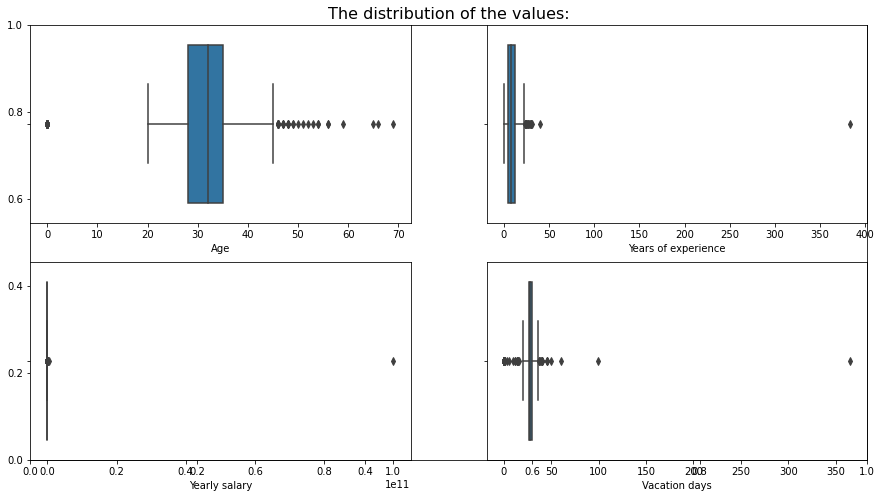

In [7]:
# the distribution of the values:

fig = plt.figure(figsize= (15, 8))
plt.title('The distribution of the values:', fontsize= 16)
axs = fig.subplots(nrows=2, ncols= 2)
sns.boxplot(data = df, x= 'Age', ax = axs[0,0])
sns.boxplot(data = df, x= 'Years of experience',ax = axs[0,1])
sns.boxplot(data = df, x= 'Yearly salary',ax = axs[1,0])
sns.boxplot(data = df, x= 'Vacation days', ax= axs[1,1])
plt.show()

##  As we can see in the figure there are some extreme outliers so we will exclude them

In [8]:
# in the yearly salary column we have nigative and exterme values, so we will detect them and delete them

df['Yearly salary'].sort_values()

982           10001
883           10001
366           10164
770           11000
1135          11500
           ...     
630          250000
576          300000
778          850000
853       500000000
473     99999999999
Name: Yearly salary, Length: 1253, dtype: int64

In [9]:
# delete the exterme outliers by their index

df = df.drop(index = [473, 778, 853])

In [10]:
# define a function to determine the outliers and exclude them (interquartile range method):

def outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR
    df_new = dataframe.loc[(dataframe[column] >= lower_boundary) & (dataframe[column] <= upper_boundary)]
    return df_new

In [11]:
# the values distribution after excluding the outliers

age = outliers(df, 'Age')
experience = outliers(df, 'Years of experience')
salary = outliers(df, 'Yearly salary')
vacation = outliers(df, 'Vacation days')

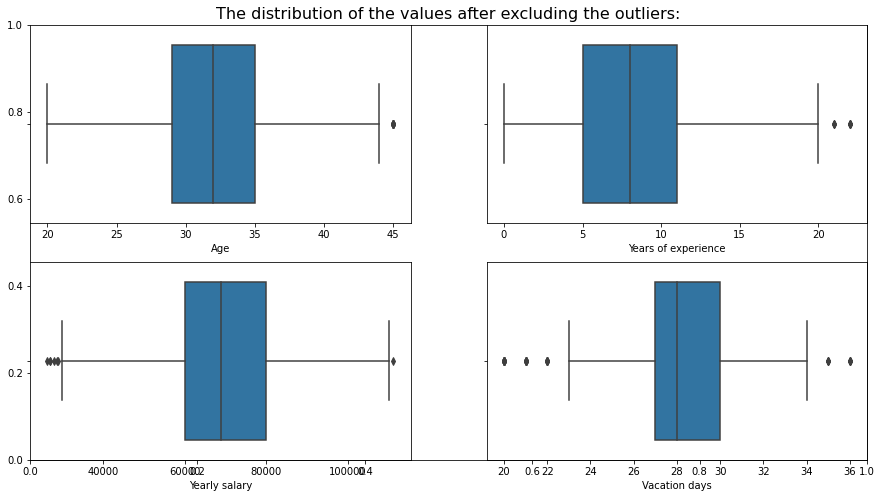

In [12]:
# the distribution of the values after excluding the outliers:

fig = plt.figure(figsize= (15, 8))
plt.title('The distribution of the values after excluding the outliers:', fontsize= 16)
axs = fig.subplots(nrows=2, ncols= 2)
sns.boxplot(data = age, x= 'Age', ax = axs[0,0])
sns.boxplot(data = experience, x= 'Years of experience',ax = axs[0,1])
sns.boxplot(data = salary, x= 'Yearly salary',ax = axs[1,0])
sns.boxplot(data = vacation, x= 'Vacation days', ax= axs[1,1])
plt.show()

# Data Visualization

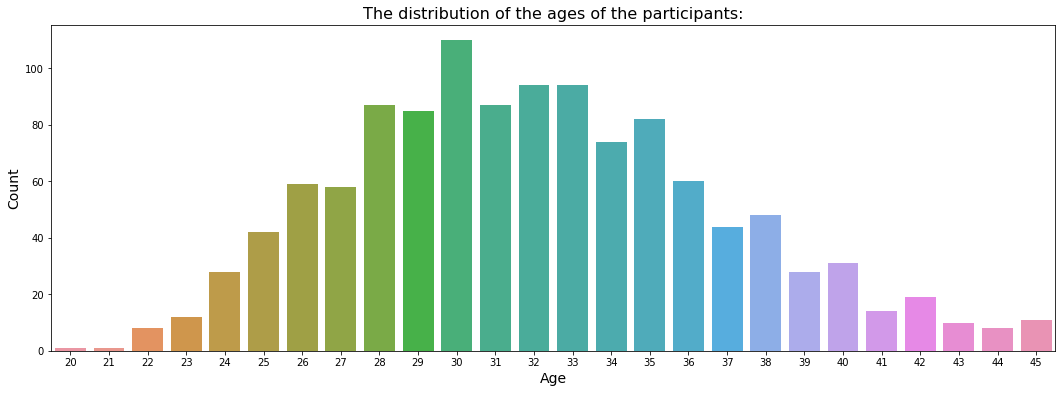

In [13]:
# the distribution of the ages of the participants:

plt.figure(figsize=(18,6))
sns.countplot(data= age, x='Age')
plt.title('The distribution of the ages of the participants:', fontsize= 16)
plt.xlabel('Age', fontsize= 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

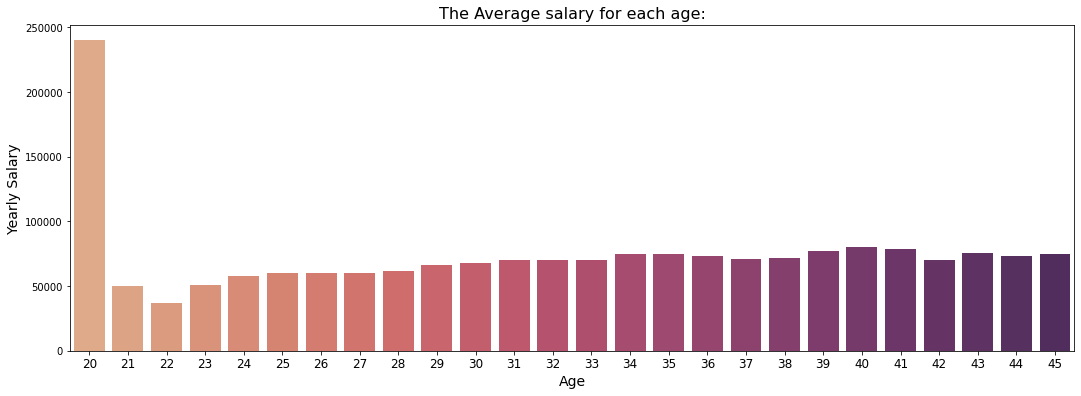

In [14]:
# the Average salary for each age

age_salary = age.groupby('Age', as_index = False).median()
plt.figure(figsize=(18, 6))
sns.barplot(data= age_salary, x= 'Age', y= 'Yearly salary',palette= 'flare')
plt.title('The Average salary for each age:', fontsize= 16)
plt.xlabel('Age', fontsize= 14)
plt.ylabel('Yearly Salary', fontsize = 14)
plt.xticks(fontsize= 12)
plt.show()

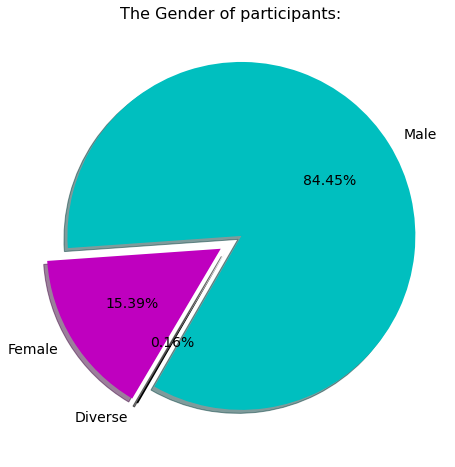

In [15]:
# the gender of participants:

plt.figure(figsize= (18, 8))
df['Gender'].value_counts().plot.pie(autopct= '%1.2F%%', fontsize= 14, startangle= 240, explode= [0.07]*3, shadow= True, colors = ['c','m','k'])
plt.title('The Gender of participants:',fontsize = 16)
plt.ylabel('')
plt.show()

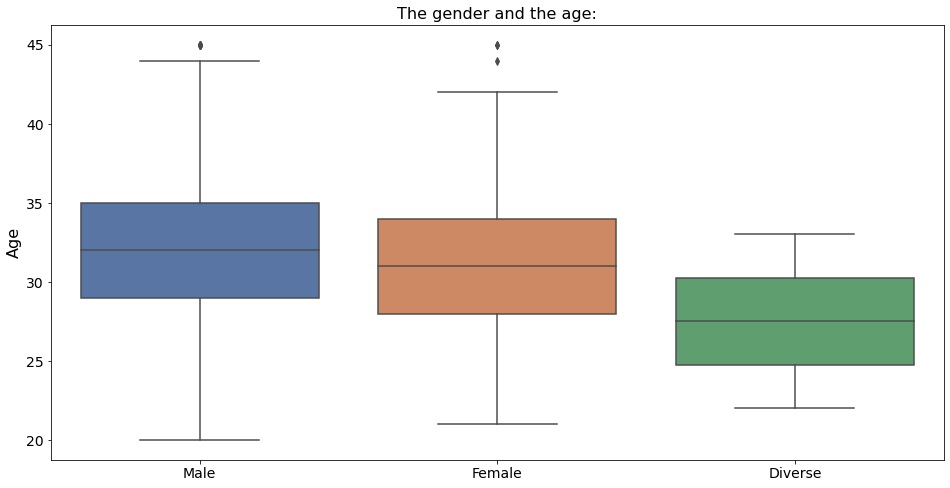

In [16]:
# The gender and the age:

plt.figure(figsize=(16,8))
sns.boxplot(data= age, x= age['Gender'], y= age['Age'], palette= 'deep')
plt.title('The gender and the age:', fontsize = 16)
plt.xlabel('')
plt.ylabel('Age', fontsize= 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

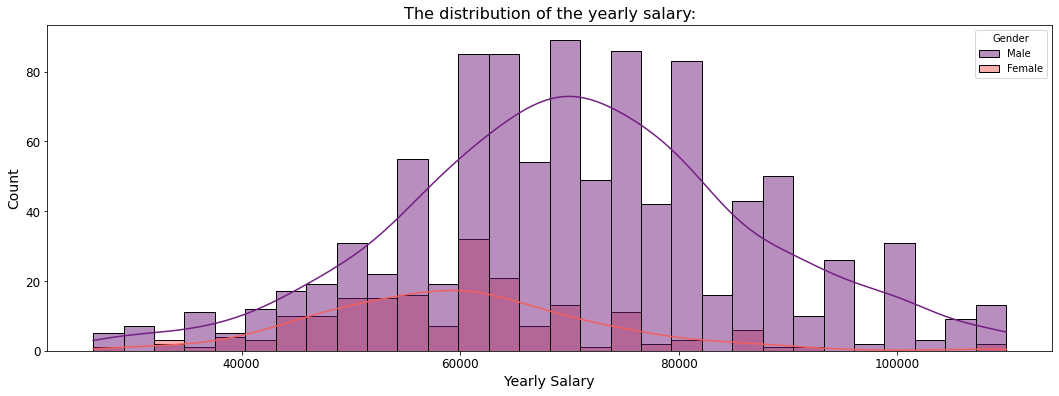

In [17]:
# the distribution of yearly salary:

plt.figure(figsize=(18,6))
sns.histplot(data= salary, x= 'Yearly salary', hue= 'Gender', palette= 'magma', kde= True, bins = 30)
plt.title('The distribution of the yearly salary:',fontsize= 16)
plt.xlabel('Yearly Salary', fontsize= 14)
plt.ylabel('Count', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize = 12)
plt.show()

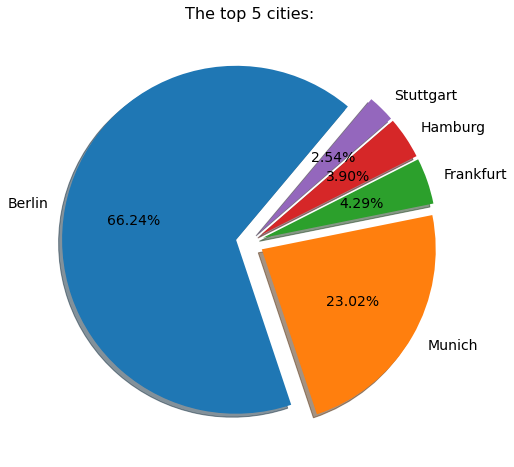

In [18]:
# The cities of participants:

plt.figure(figsize= (18,8))
plt.pie(df['City'].value_counts().head(5), labels=df['City'].value_counts().head(5).index ,textprops ={'fontsize' : 14}, 
        explode= [0.08]*5, shadow= True, startangle= 50, autopct= '%1.2F%%')
plt.title('The top 5 cities:', fontsize= 16)
plt.show()

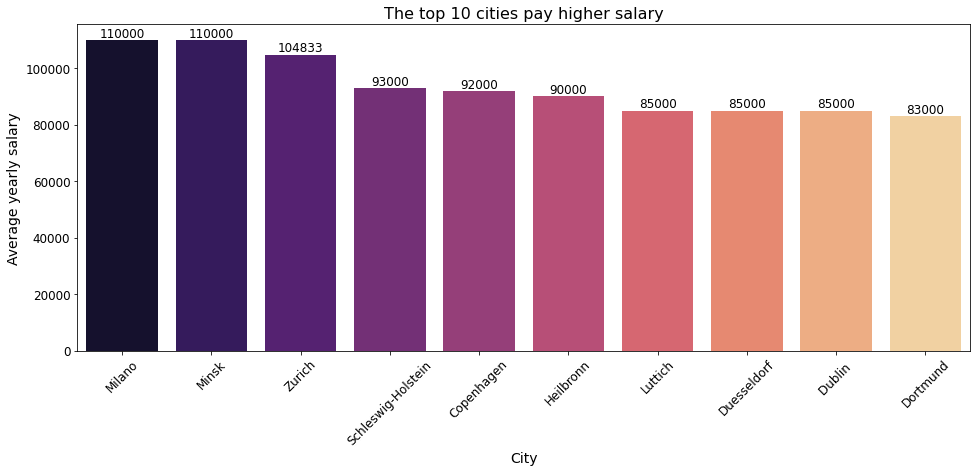

In [19]:
# The top 10 cities pay the higher salary:

salary_city = salary.groupby('City', as_index= False).mean().sort_values('Yearly salary', ascending = False) # sort cities according to the salary

# two values in top 10 are not cities so droped them:

salary_city = salary_city.drop(index= [81, 15])

salary_city = salary_city.head(10)
plt.figure(figsize = (16,6))
ax = sns.barplot(data= salary_city, x= 'City', y= 'Yearly salary',palette= 'magma')
plt.title('The top 10 cities pay higher salary', fontsize= 16)
plt.xlabel('City', fontsize = 14)
plt.ylabel('Average yearly salary', fontsize= 14)
plt.xticks(fontsize= 12, rotation= 45)
plt.yticks(fontsize = 12)
plt.bar_label(ax.containers[0], label_type = 'edge',fontsize = 12)
plt.show()

In [20]:
# the realation between the seniority level and years of experience:

experience['Seniority level'].value_counts()

Senior                       554
Middle                       364
Lead                         161
Junior                        79
Head                          40
Principal                      3
student                        1
Intern                         1
Entry level                    1
Working Student                1
C-Level                        1
Student                        1
intern                         1
Director                       1
C-level executive manager      1
Key                            1
No level                       1
CTO                            1
Work Center Manager            1
Manager                        1
VP                             1
No level                       1
Self employed                  1
Name: Seniority level, dtype: int64

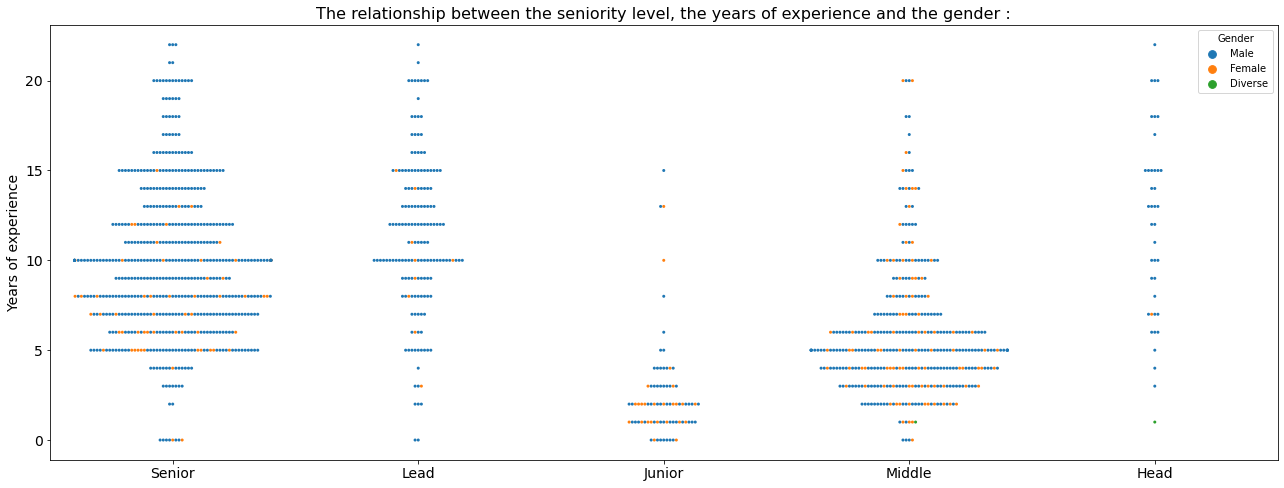

In [21]:
# We noticed that there are 5 main seniority level so we will exclude the others:

experience_seniority = experience.loc[experience['Seniority level'].isin(['Senior', 'Middle','Lead', 'Junior', 'Head'])]


plt.figure(figsize=(22, 8))
sns.swarmplot(data= experience_seniority, x='Seniority level', y= 'Years of experience',s = 3, hue= 'Gender')
plt.title('The relationship between the seniority level, the years of experience and the gender :', fontsize = 16)
plt.xlabel('')
plt.ylabel('Years of experience' ,fontsize= 14)
plt.xticks(fontsize= 14)
plt.yticks(fontsize = 14)
plt.show()

In [22]:
# the distribution of programing languages:

# We noticed that there are many repeated values in different forms (for example we have :javascript, Javascript, JavaScript, Js, js)
# so we will unify them:

df = df.replace(['javascript','Javascript', 'js', 'JS'], 'JavaScript')
df = df.replace(['python', 'Python '], 'Python')
df = df.replace('c++', 'C++')
df = df.replace(['.net', '.Net'], '.NET')
df = df.replace(['Sql', 'sql'], 'SQL')
df = df.replace(['php','Php'], 'PHP')
df = df.replace('java', 'Java')
df = df.replace(['typescript', 'Typescript'], 'TypeScript')

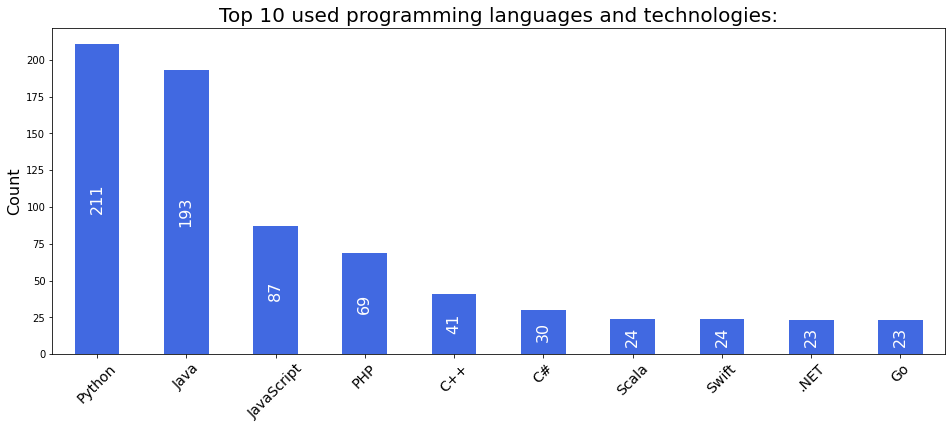

In [23]:
# top 10 programming languages and technologies:

plt.figure(figsize=(16, 6))
ax = df['Main technology'].value_counts().head(10).plot(kind = 'bar', color = 'royalblue')
plt.title('Top 10 used programming languages and technologies:', fontsize = 20)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 14, rotation = 45)
plt.bar_label(ax.containers[0], label_type = 'center',fontsize = 16, rotation = 90, color = 'w')
plt.show()

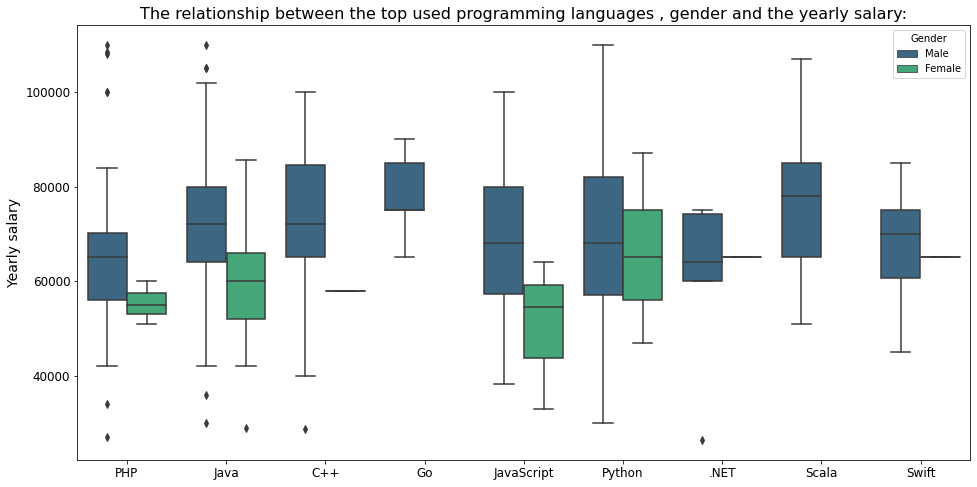

In [24]:
# the relationship between the programming languages , gender and the yearly salary:

salary_language = salary.loc[salary['Main technology'].isin(['Python', 'Java', 'JavaScript', 'PHP', 'C++', 'Scala', 'Swift', '.NET', 'Go'])]

plt.figure(figsize = (16,8))
sns.boxplot(data = salary_language, x = 'Main technology', y= 'Yearly salary', hue = 'Gender', palette = 'viridis')
plt.title('The relationship between the top used programming languages , gender and the yearly salary:', fontsize = 16)
plt.xlabel('')
plt.ylabel('Yearly salary', fontsize= 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

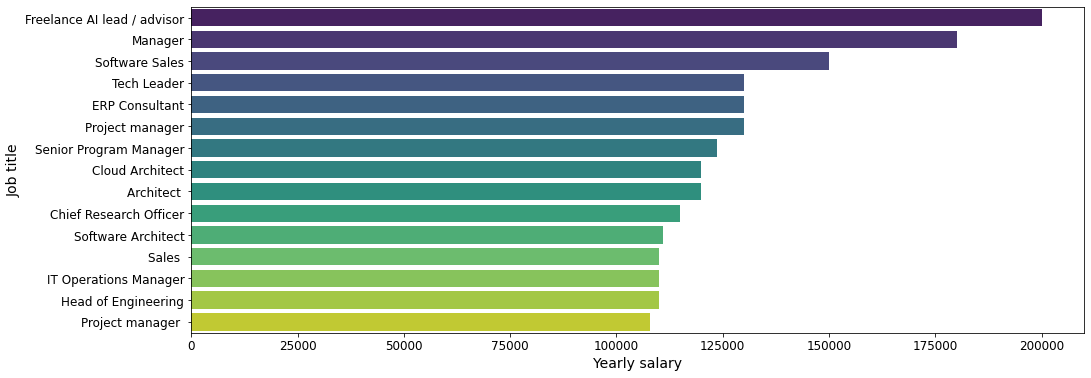

In [25]:
# top 10 positons get the highest salaries

position = df.groupby('Position', as_index= False).median().sort_values('Yearly salary', ascending = False).head(15)

plt.figure(figsize= (16 , 6))
sns.barplot(data = position, y = 'Position', x = 'Yearly salary', palette = 'viridis')
plt.xlabel('Yearly salary', fontsize= 14)
plt.ylabel('Job title', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

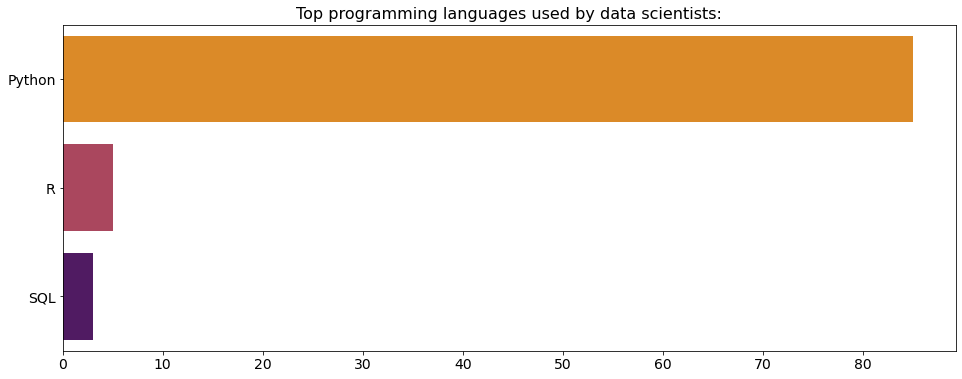

In [26]:
# top programming languages and technologies used by data scientists:

ds = df.loc[df['Position'] == 'Data Scientist']

plt.figure(figsize= (16,6))
sns.barplot(x= ds['Main technology'].value_counts()[:3] , y= ds['Main technology'].value_counts()[:3].index, palette = 'inferno_r')
plt.title('Top programming languages used by data scientists:' ,fontsize = 16)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.xlabel('')
plt.show()

In [27]:
# the distribution of the employment status of the participants:

df['Employment status'].value_counts()

Full-time employee                                                                 1188
Self-employed (freelancer)                                                           28
Part-time employee                                                                    8
Founder                                                                               3
Company Director                                                                      1
working student                                                                       1
Working Student                                                                       1
Full-time position, part-time position, & self-employed (freelancing, tutoring)       1
Intern                                                                                1
full-time, but 32 hours per week (it was my request, I'm a student)                   1
Werkstudent                                                                           1
Name: Employment status, dtype: 

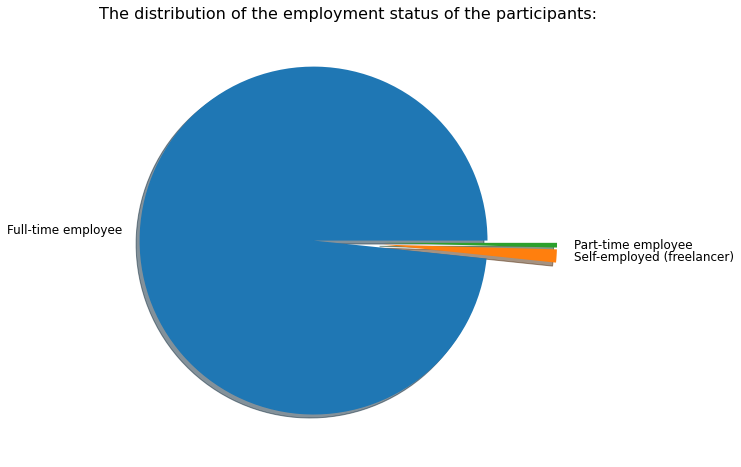

In [28]:
# we noticed that there are three main employment status so we will exclude the others:

status = salary.loc[salary['Employment status'].isin(['Full-time employee','Self-employed (freelancer)','Part-time employee'])]
status.shape
plt.figure(figsize= (20,8))
plt.pie(status['Employment status'].value_counts(), labels= status['Employment status'].value_counts().index, explode = [0.2]*3,
       textprops = {'fontsize' : 12}, shadow = True)
plt.title('The distribution of the employment status of the participants:', fontsize = 16)
plt.show()

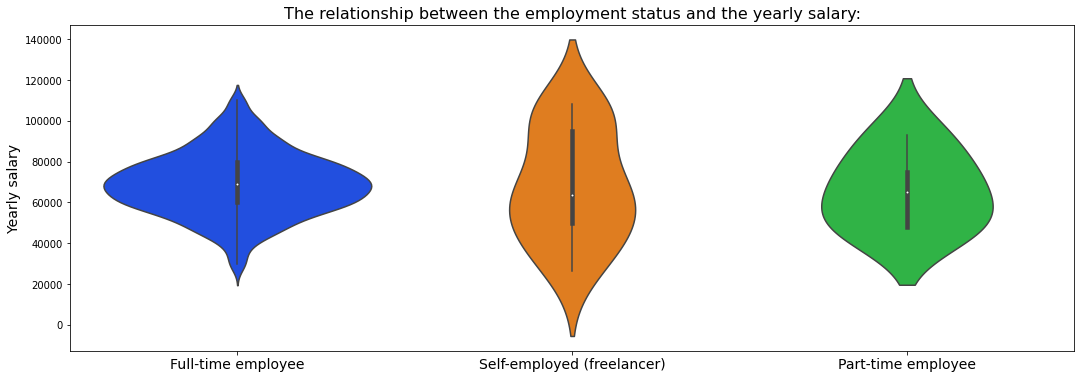

In [29]:
# the relationship between the employment status and the yearly salary:

plt.figure(figsize = (18, 6))
sns.violinplot(data = status, x= 'Employment status', y= 'Yearly salary', palette = 'bright')
plt.title('The relationship between the employment status and the yearly salary:', fontsize = 16)
plt.xlabel('')
plt.ylabel('Yearly salary', fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()

In [30]:
# the relationship between the contract duration and the years of experienceaa:

df['Сontract duration'].value_counts()

Unlimited contract    1157
Temporary contract      64
0                        1
Name: Сontract duration, dtype: int64

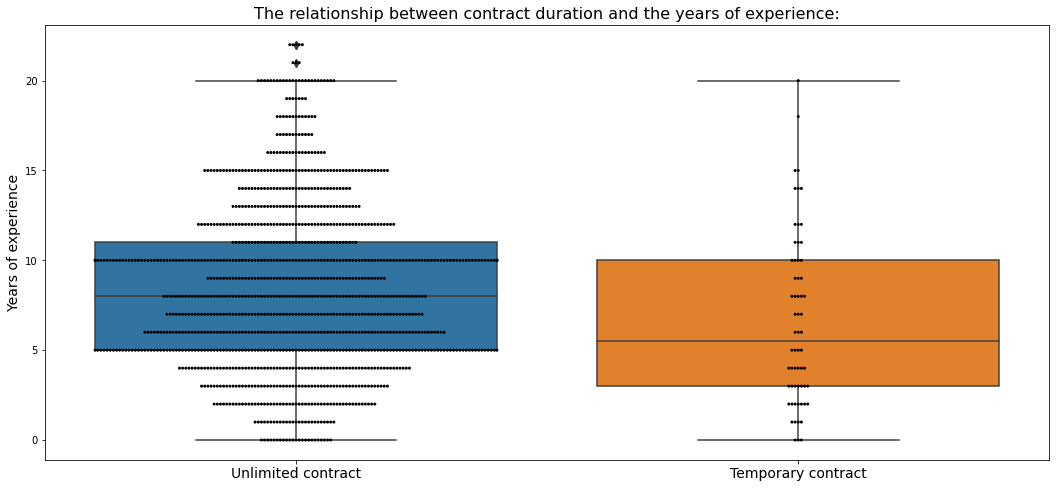

In [31]:
# we noticed that there is a wrong value so we will exclude it:
contract = experience.loc[experience['Сontract duration'] !=  '0']

plt.figure(figsize= (18, 8))
sns.boxplot(data = contract, x= 'Сontract duration', y = 'Years of experience')
sns.swarmplot(data = contract, x= 'Сontract duration', y = 'Years of experience',s = 3, color= 'black')
plt.title('The relationship between contract duration and the years of experience:', fontsize = 16)
plt.xlabel('')
plt.ylabel('Years of experience', fontsize = 14)
plt.xticks(fontsize= 14)
plt.show()

In [32]:
# the distribution of the company types:

df['Company type'].value_counts()

Product                759
Startup                251
Consulting / Agency    142
Bank                     5
Media                    3
                      ... 
Publisher                1
Energy                   1
Enterprise               1
service                  1
eCommerce                1
Name: Company type, Length: 63, dtype: int64

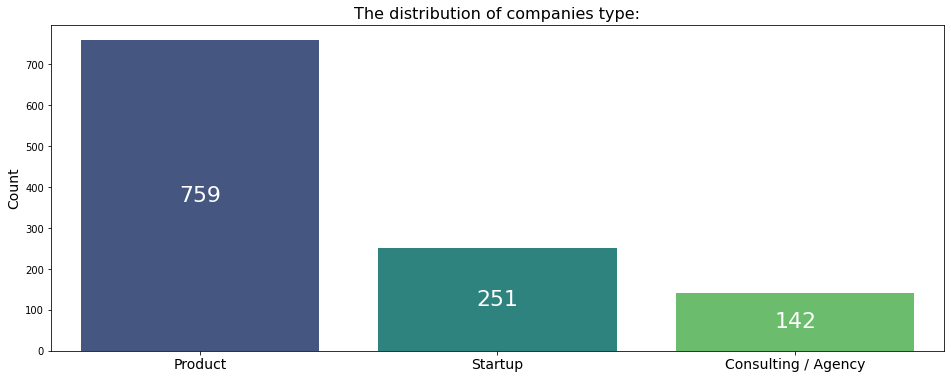

In [33]:
# we noticed that there are three main company types so we will exclude the others:

company = df.loc[df['Company type'].isin(['Product', 'Startup', 'Consulting / Agency'])]

plt.figure(figsize= (16,6))
ax = sns.countplot(data = company, x = 'Company type', palette = 'viridis')
plt.title('The distribution of companies type:', fontsize = 16)
plt.xlabel('')
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.bar_label(ax.containers[0], label_type = 'center',fontsize = 22, color = 'w')
plt.show()

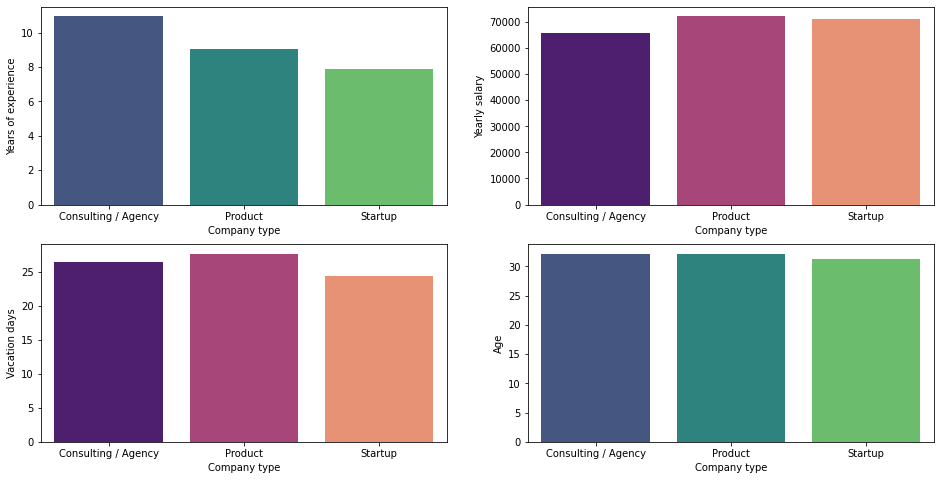

In [34]:
# the relationship between the company type and the other features:

company_type = company.groupby('Company type', as_index= False).mean()

fig = plt.figure(figsize= (16, 8))
axs = fig.subplots(nrows=2, ncols= 2)
sns.barplot(data = company_type, x= 'Company type', y = 'Yearly salary', ax = axs[0,1], palette= 'magma')
sns.barplot(data = company_type, x= 'Company type', y = 'Years of experience', ax = axs[0,0], palette = 'viridis')
sns.barplot(data = company_type, x= 'Company type', y = 'Vacation days', ax = axs[1,0], palette = 'magma')
sns.barplot(data = company_type, x= 'Company type', y = 'Age', ax = axs[1,1], palette = 'viridis')
plt.show()

### Some insights we can get from the figure:
#### - The 'Consulting/Agency' companies require higher years of experience and pay the lowest salary.
#### - The Startups require lower years of experience and give lower vacation days.
#### - The 'Product' companyies pay higher salary and give higer vacation days.


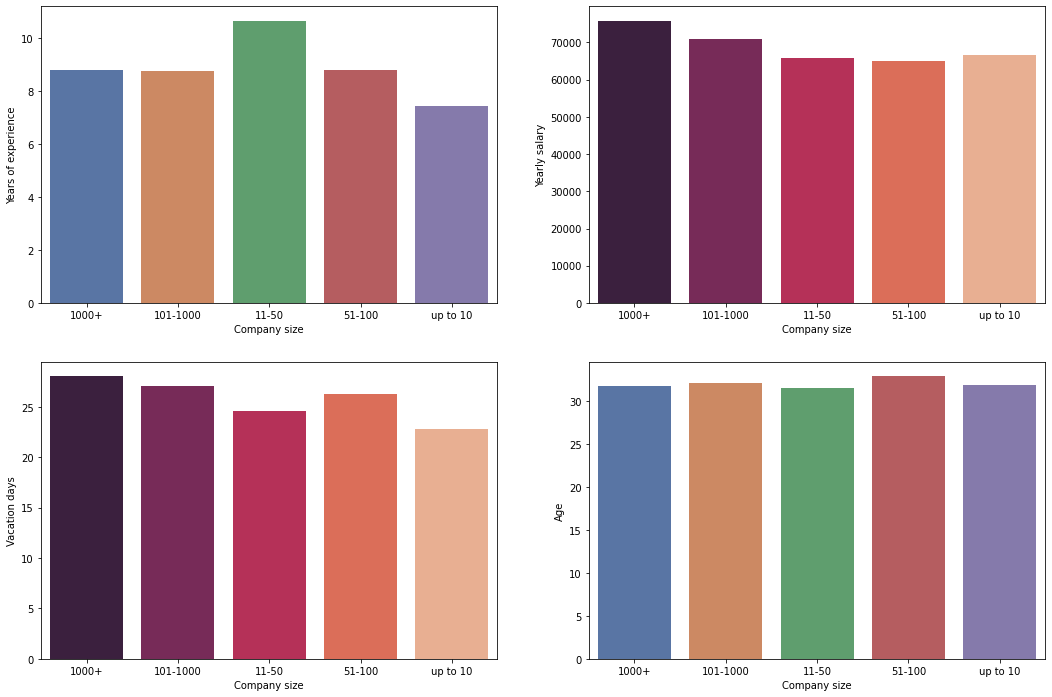

In [35]:
company_size = df.groupby('Company size', as_index = False).mean()

fig = plt.figure(figsize= (18, 12))
axs = fig.subplots(nrows=2, ncols= 2)
sns.barplot(data = company_size, x= 'Company size', y = 'Yearly salary', ax = axs[0,1], palette= 'rocket')
sns.barplot(data = company_size, x= 'Company size', y = 'Years of experience', ax = axs[0,0], palette = 'deep')
sns.barplot(data = company_size, x= 'Company size', y = 'Vacation days', ax = axs[1,0], palette = 'rocket')
sns.barplot(data = company_size, x= 'Company size', y = 'Age', ax = axs[1,1], palette = 'deep')
plt.show()

### some insights we can get form the figure :
#### - The 'Up to 10' companies require lower years of experience and give lower vacation days.
#### - The '11-50' companies requier higer years of experience and pay lower salary
#### - The '1000+' compnaies give higer salary and higer vacation days.